# 1. Walking Speed Analysis 
## Scatter Plot of Age vs Walking Speed with Regression Line 

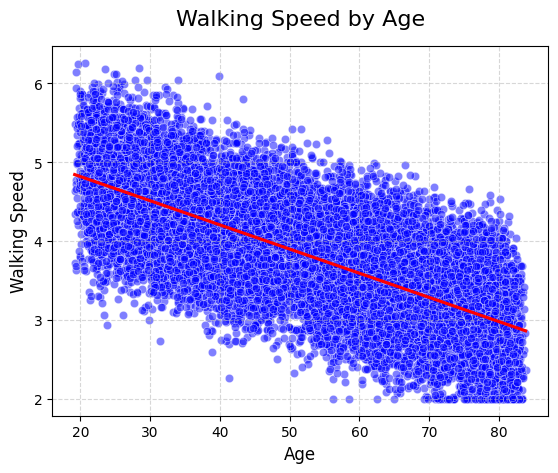

Linear Regression Model: walking_speed = -0.0307*age + 5.4324


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats

df = pd.read_csv('ms_data_with_insurance.csv')
model1 = smf.ols(data=df, formula='walking_speed~age')
results1 = model1.fit()

sns.scatterplot(data=df, x='age', y='walking_speed', alpha=0.5, color='blue', markers='.')
sns.regplot(data=df, 
            x='age',
            y='walking_speed',
            color='red',
            scatter=False,
            fit_reg=True)
plt.title('Walking Speed by Age', fontsize=16, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Walking Speed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


print(f"Linear Regression Model: walking_speed = {results1.params['age']:.4f}*age + {results1.params['Intercept']:.4f}")

## Box plots by education level 

/tmp/ipykernel_25945/3802975018.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='education_level', y='walking_speed', palette='cool', linewidth=1.2, width=0.6, fliersize=3)


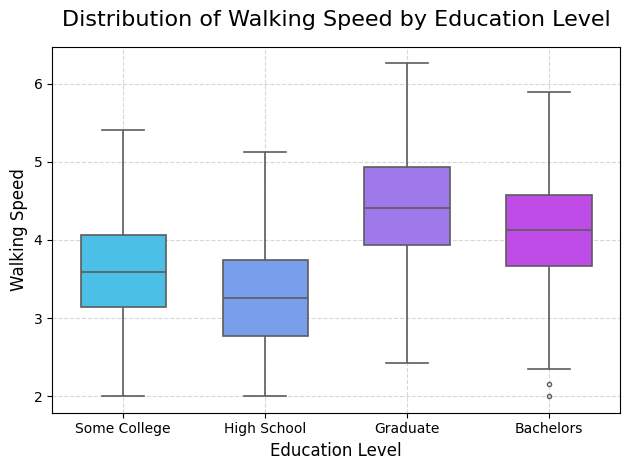

In [8]:

sns.boxplot(data=df, x='education_level', y='walking_speed', palette='cool', linewidth=1.2, width=0.6, fliersize=3)
plt.title('Distribution of Walking Speed by Education Level', fontsize=16, pad=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Walking Speed', fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Line plot showing education age interaction

/tmp/ipykernel_25945/547914571.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby(['age_group', 'education_level'])['walking_speed'].mean().reset_index()


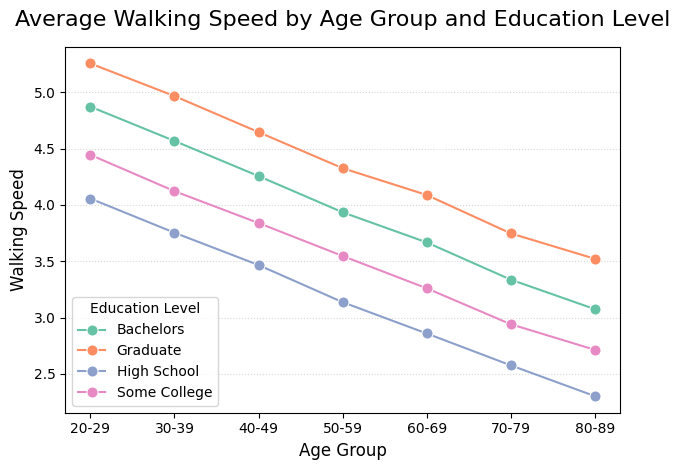

In [ ]:
df['age_group'] = pd.cut(
    df['age'], 
    bins=range(20, 91, 10),  
    right=False, 
    labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
)

# Aggregate
agg_data = df.groupby(['age_group', 'education_level'])['walking_speed'].mean().reset_index()

sns.lineplot(data=agg_data, x='age_group', y='walking_speed', hue='education_level',
             marker='o', palette='Set2', linewidth=1.5, markersize=8)
plt.title('Average Walking Speed by Age Group and Education Level', fontsize=16, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Walking Speed', fontsize=12)
plt.legend(title='Education Level', loc='lower left', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Cost Analysis
## Bar plot of mean costs by insurance type

/tmp/ipykernel_25945/1318513150.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_25945/1318513150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


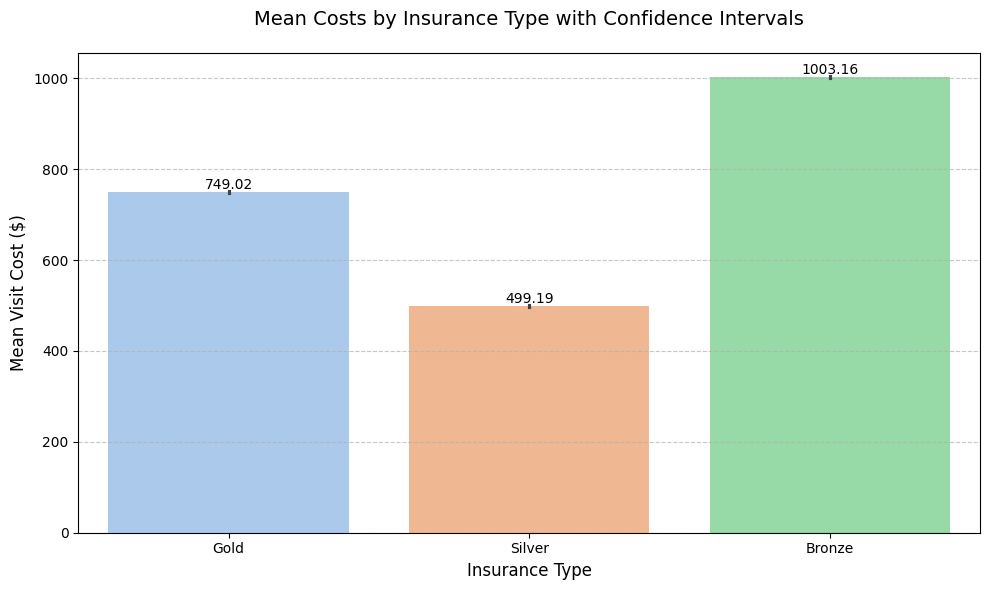

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df, 
    x='insurance_type', 
    y='visit_cost', 
    order=['Gold', 'Silver', 'Bronze'],  
    ci=95, 
    palette='pastel'
)

# put the bar labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

plt.title('Mean Costs by Insurance Type with Confidence Intervals', fontsize=14, pad=20)
plt.xlabel('Insurance Type', fontsize=12)
plt.ylabel('Mean Visit Cost ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




## Box plots showing cost distributions

/tmp/ipykernel_25945/577967935.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='insurance_type', y='visit_cost',


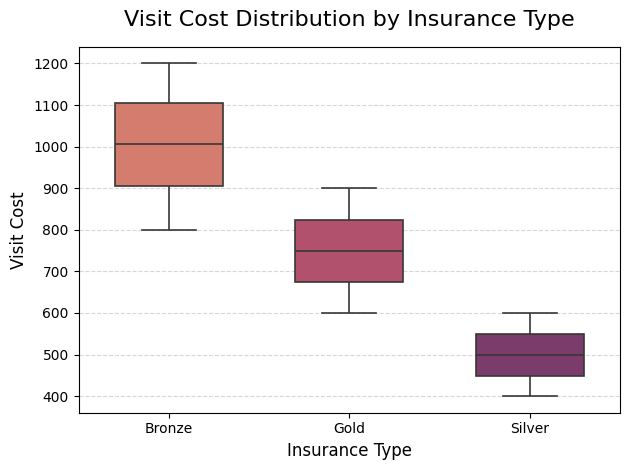

In [29]:

sns.boxplot(data=df, x='insurance_type', y='visit_cost', 
            palette='flare', width=0.6, fliersize=2.5, linewidth=1.2)
plt.title('Visit Cost Distribution by Insurance Type', fontsize=16, pad=15)
plt.xlabel('Insurance Type', fontsize=12)
plt.ylabel('Visit Cost', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Combined Visualization
## Pair Plot of Key Variables

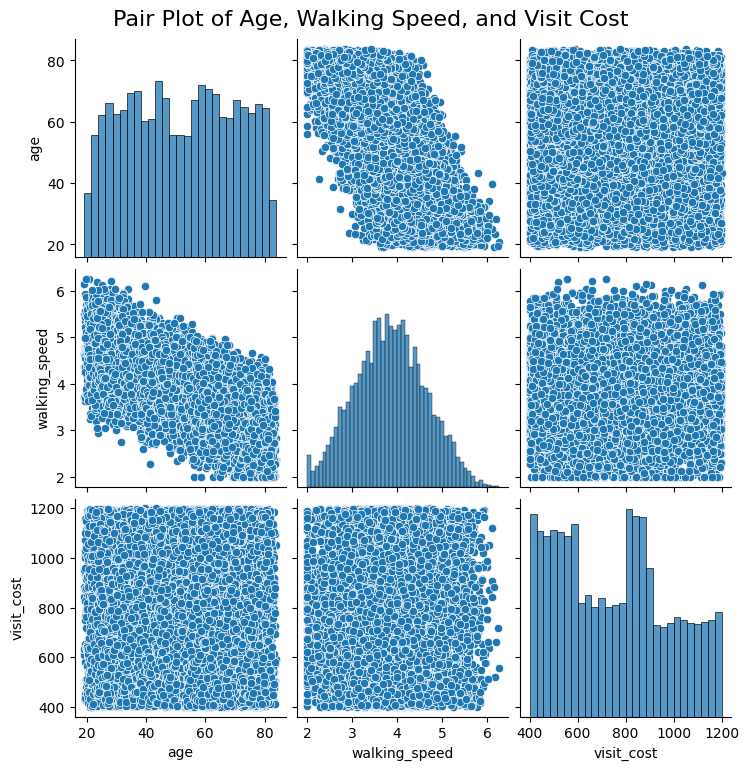

In [ ]:

key_vars = df[['age', 'walking_speed', 'visit_cost']]

sns.pairplot(key_vars)
plt.suptitle('Pair Plot of Age, Walking Speed, and Visit Cost', y=1.02, fontsize=16)
plt.show()

## Faceted plots by education/insurance

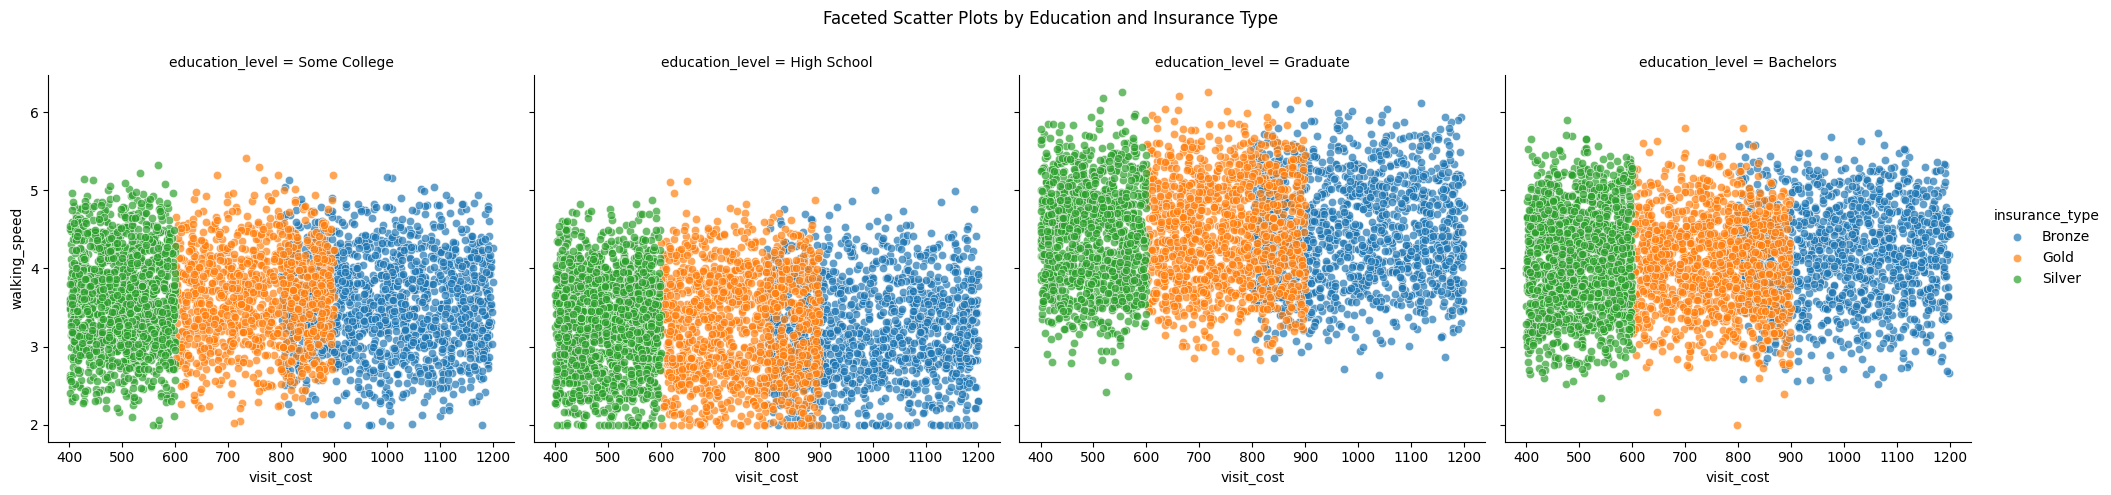

In [4]:
grid = sns.FacetGrid(data=df, col="education_level", hue="insurance_type", height=5, aspect=1)
grid.map(sns.scatterplot, "visit_cost", "walking_speed", alpha=0.7)
grid.add_legend()
grid.fig.subplots_adjust(top=0.85)
grid.fig.suptitle("Faceted Scatter Plots by Education and Insurance Type")
plt.show() 


## Time trends where relevant

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_a

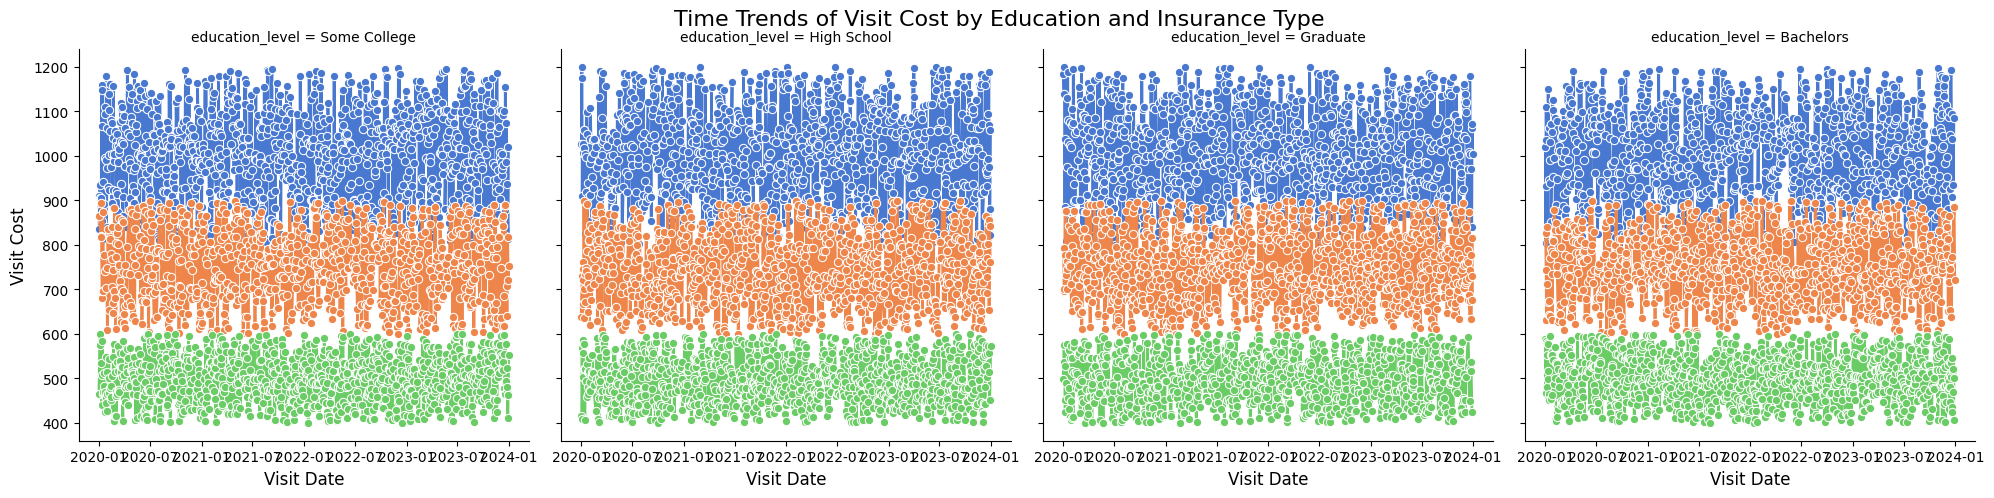

In [6]:

df['visit_date'] = pd.to_datetime(df['visit_date'])

# plot visit_cost over time
grid = sns.FacetGrid(data=df, col="education_level", hue="insurance_type", height=5, aspect=1, palette='muted')
grid.map(sns.lineplot, "visit_date", "visit_cost", marker="o", ci=None, lw=2)

grid.set_axis_labels("Visit Date", "Visit Cost", fontsize=12)
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Time Trends of Visit Cost by Education and Insurance Type", fontsize=16)
plt.show()
